StandardScaler gets rid of the mean value and adjusts the scales of all of the features and variables such that they correspond to the unit variance. This operation is carried out in a manner that is unaffected by the properties that it modifies. Because it requires an estimate of the empirical standard deviation of each feature, StandardScaler is susceptible to being affected by outliers because it requires such an estimate (assuming that such features are available in the dataset).

 Determine the degree of correlation that exists between two or more columns in a DataFrame, you may make use of the DataFrame.corr() method. The degree and direction of the relationship between two quantitative variables may be analysed with the help of correlation. It is represented by the letter r, and its values range from minus one to plus one.



The synthetic minority oversampling approach, also known as SMOTE, is one of the oversampling strategies that is used the most often to remedy the imbalance issue.

bringing in a method that assists with data splitting for both training and testing through the train testing split operation.

importing pandas library use for data read ,cleaning

importing matplotlib use for data visualization
import Standard Scaler use to data normalization

In [ ]:
import  pandas as pd 
#importing pandas library use for data read ,cleaning
import matplotlib.pyplot as Matplot
# importing matplotlib use for data visualization
import seaborn as sns
# importint the standard caler method from scikit learn package.
from imblearn.over_sampling import SMOTE
# import the somte techinque from over sampling.
from sklearn.preprocessing import StandardScaler
#import Standard Scaler use to data normalization
from sklearn.model_selection import train_test_split
# # bringing in a method that assists with data splitting for both training and testing through the train testing split operation.
from sklearn.ensemble import RandomForestClassifier
#importing the RandomForest Classifieralgorithm from sk_learn.
from sklearn.ensemble import GradientBoostingClassifier
#importing the gradient boosting algorithm from sk_learn.
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [ ]:
Heart_data = pd.read_csv("/content/drive/MyDrive/asm/heart.csv")# reading Heart_data  using pandas library 

In [ ]:
Heart_data # showing Heart_data 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
Heart_data.info() # showing Heart_data infomation 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
Heart_data.describe() # describe Heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
Heart_data.isnull().sum() # check null value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#PLOTTING CORRELATION MATRIX 

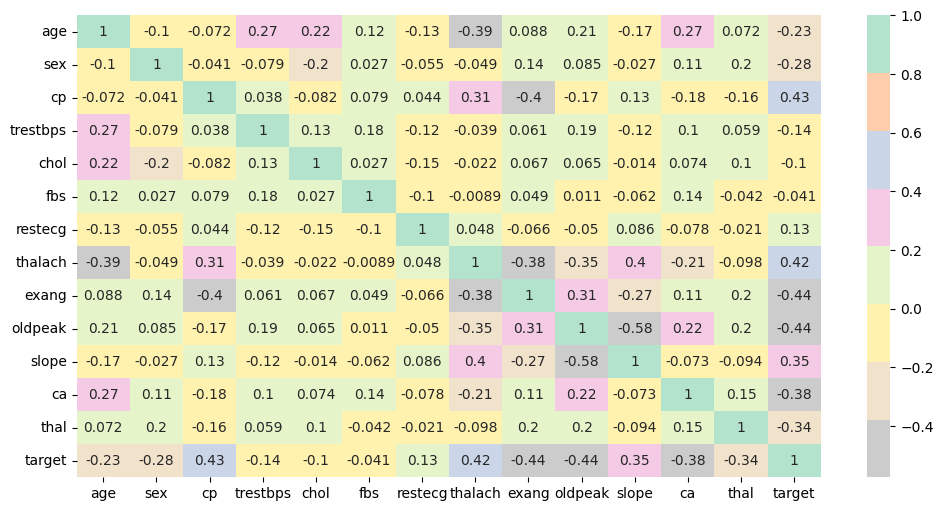

In [ ]:
#PLOTTING CORRELATION MATRIX
Matplot.figure(figsize=(12,6)) # set fig size 
dataplot=sns.heatmap(Heart_data.corr(),  cmap="Pastel2_r", annot=True)
# displaying  graph 
Matplot.show()

#plotting count plot for target label

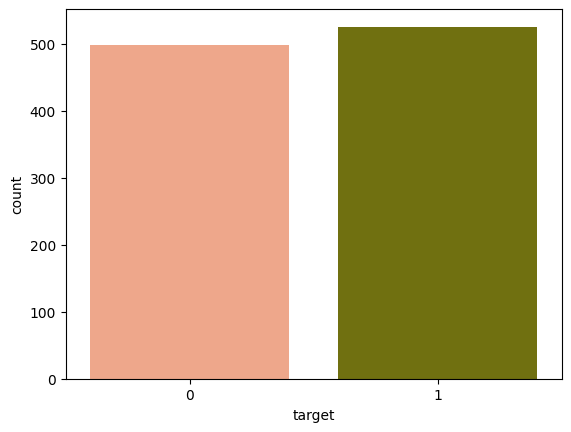

In [ ]:
#plotting count plot for target label
custom_palette1 = ["LightSalmon", "Olive"] #  set color 
sns.countplot(x='target',data=Heart_data, palette=custom_palette1)
Matplot.show()# it is used to show the graph.

# Plotting Countplot of Age with Sex

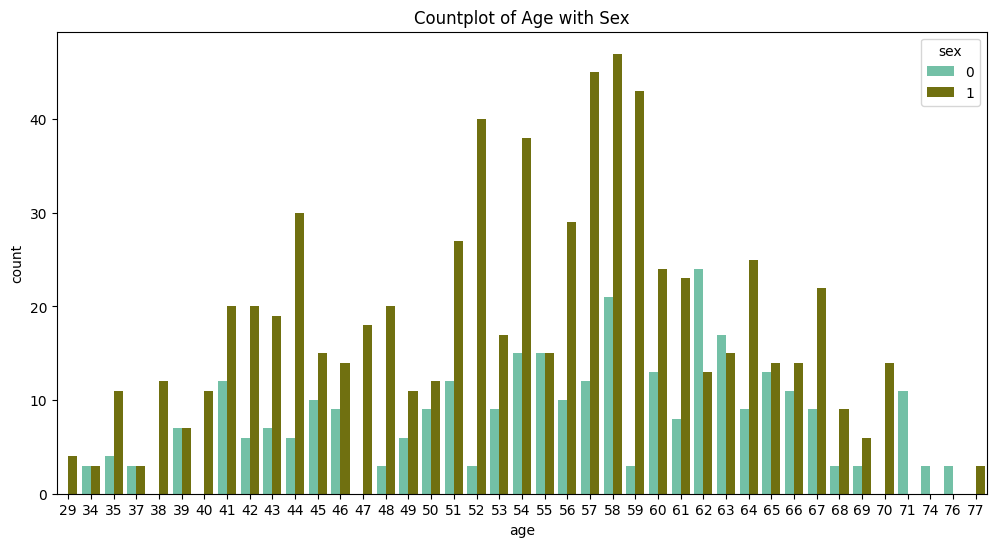

In [ ]:
#Countplot of Age with Sex
# Define the color palette
custom_palette = ["MediumAquamarine", "Olive"] #set color 

# Create the countplot with the custom color palette
Matplot.figure(figsize=(12, 6)) # set fig size 
sns.countplot(x=Heart_data['age'], hue=Heart_data['sex'], palette=custom_palette)

# Add a title to the countplot
Matplot.title("Countplot of Age with Sex")

Matplot.show() # showing graph 


#Plotting Countplot of sex with target

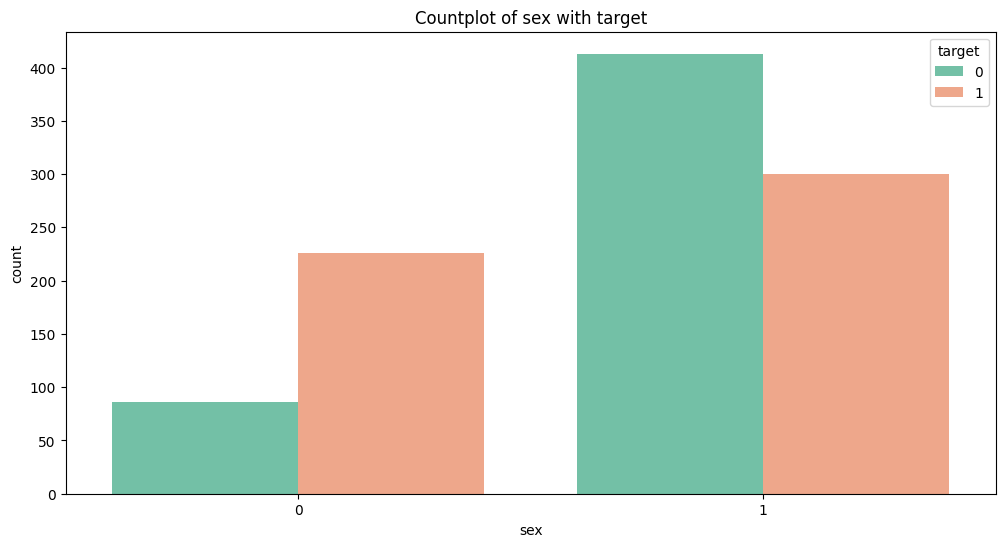

In [ ]:
#Countplot of sex with target
# Define the color palette
custom_palette = ["MediumAquamarine", "LightSalmon"] # set color 

# Create the countplot with the custom color palette
Matplot.figure(figsize=(12, 6)) # set fig size 
sns.countplot(x=Heart_data['sex'], hue=Heart_data['target'], palette=custom_palette)

# Add a title to the countplot
Matplot.title("Countplot of sex with target")

Matplot.show() # showing graph 

#Plotting Countplot of chest pain with target

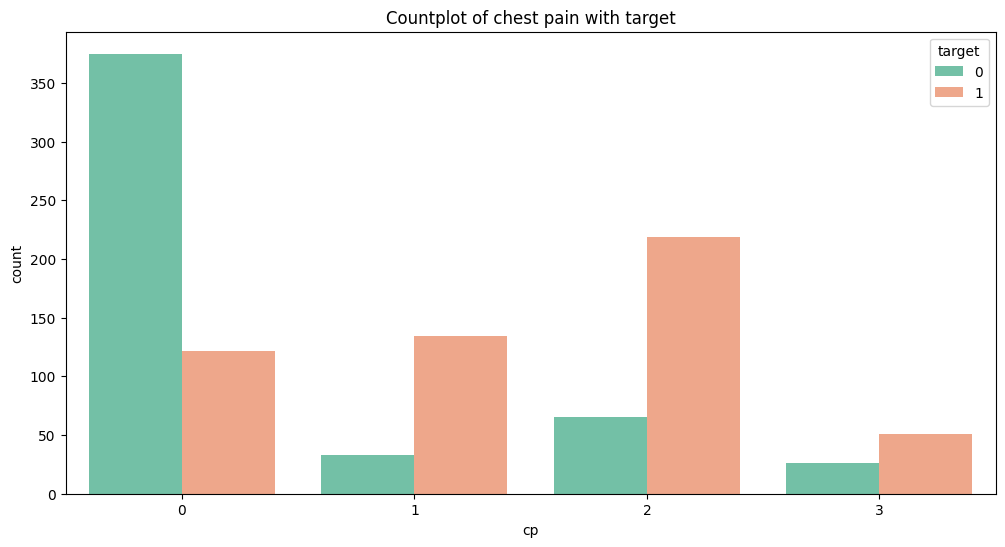

In [ ]:
Matplot.figure(figsize=(12, 6)) # set fig size 
sns.countplot(x=Heart_data['cp'], hue=Heart_data['target'], palette=custom_palette)

# Add a title to the countplot
Matplot.title("Countplot of chest pain with target")

Matplot.show() # showing graph 

<Figure size 1000x600 with 0 Axes>

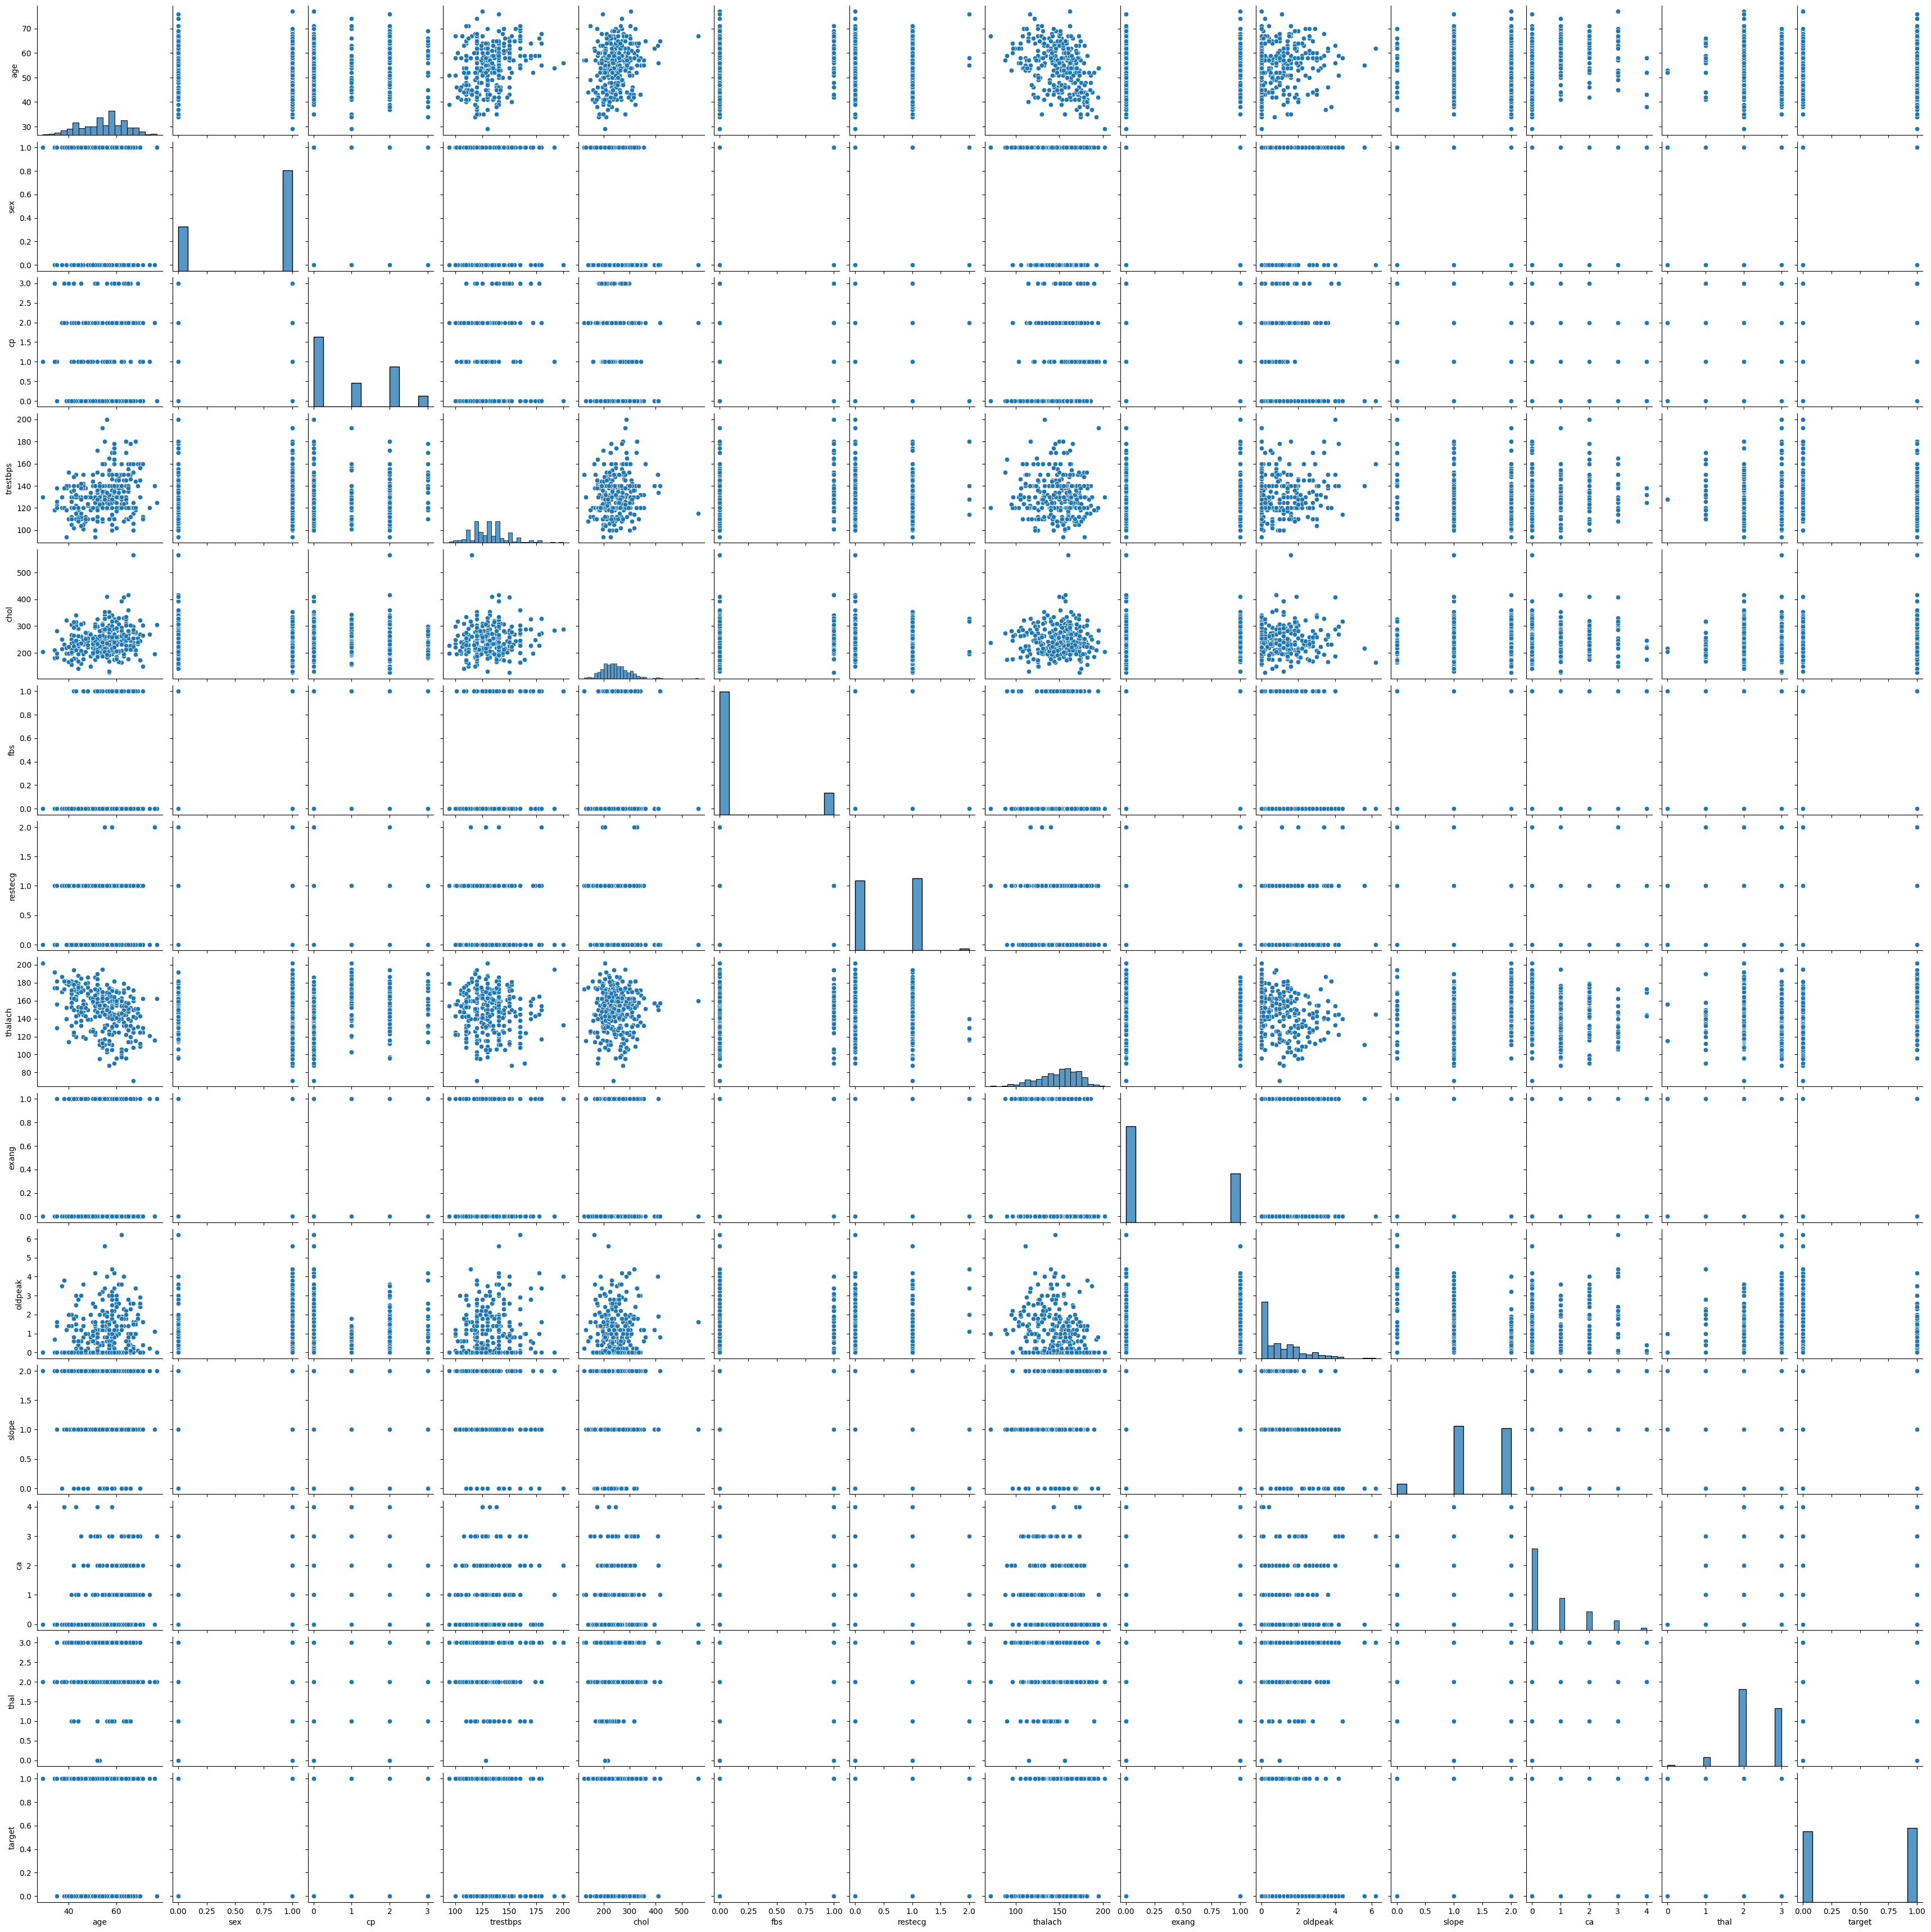

In [ ]:
# Create the pairplot 
Matplot.figure(figsize=(10,6)) # set fig size 
sns.pairplot(Heart_data)
Matplot.show(); # show graph 

In [ ]:
#independet dependent variable x and y 
x = Heart_data.drop('target',axis=1)
y = Heart_data['target']

In [ ]:
x.shape, y.shape # print x and y shape 

((1025, 13), (1025,))

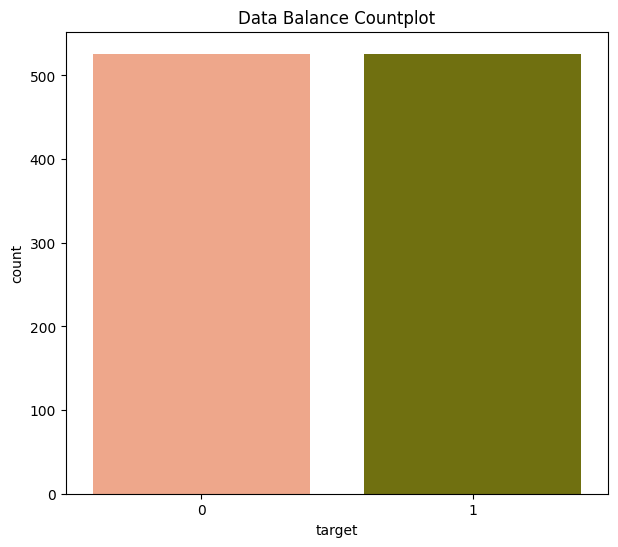

In [ ]:
# Assuming you have the feature data in 'x' and the target variable in 'y'
# Balancing the data using SMOTE
x, y = SMOTE().fit_resample(x,y)
# set the figure size for graph.
Matplot.figure(figsize=[7,6])
# plot the countplot graph.
Matplot.title("Data Balance Countplot")
sns.countplot(data = Heart_data.reset_index(), x = y, palette=custom_palette1);

In [ ]:
# define classifier for scalling.
scaler = StandardScaler()
# fit classifier with data.
scaler.fit(x)
sc_x = scaler.transform(x)

#SPLIT DATASET TRAINING AND TESTING 80% - 20% 

In [ ]:
#split heart dataset training and testing 
Xtrain_Heart_Data, Xtest_Heart_Data, Ytrain_Heart_Data, Ytest_Heart_Data = train_test_split(sc_x, y, test_size = 0.2, random_state = 0)


In [ ]:
# printing  shape of x train ,test and y train , test 
Xtrain_Heart_Data.shape, Xtest_Heart_Data.shape, Ytrain_Heart_Data.shape, Ytest_Heart_Data.shape

((841, 13), (211, 13), (841,), (211,))

#RandomForestClassifier model

In [ ]:
model1 = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
model1.fit(Xtrain_Heart_Data, Ytrain_Heart_Data) # model fitting 
ypred= model1.predict(Xtrain_Heart_Data)  # predict model 

#TRAINING RESULTS FOR  RANDOMFOREST CLASSIFIER MODEL

In [ ]:
#Calculate the results and display 
# Calculating and printing the accuracy score
print("TRAINING ACC SCORE: %.3f" %(accuracy_score(Ytrain_Heart_Data,ypred)))
print("................................................")
# Calculating and printing the precision score
print("TRAINING PRECISION SCORE: %.3f" %(precision_score(Ytrain_Heart_Data,ypred)))
print("................................................")
# Calculating and printing the recall score
print("TRAINING RECALL SCORE: %.3f" %(recall_score(Ytrain_Heart_Data,ypred)))
print(".................................................")
 # Calculating and printing the F1 score
print("TRAINING F1 SCORE: %.3f" %(f1_score(Ytrain_Heart_Data,ypred))) 

TRAINING ACC SCORE: 0.951
................................................
TRAINING PRECISION SCORE: 0.929
................................................
TRAINING RECALL SCORE: 0.979
.................................................
TRAINING F1 SCORE: 0.953


#Printing sensitivity and Specificity for training data

In [ ]:
C_MATRIX = confusion_matrix(Ytrain_Heart_Data,ypred)
Sensitivity = C_MATRIX[0,0]/(C_MATRIX[0,0]+C_MATRIX[0,1])
Specificity = C_MATRIX[1,1]/(C_MATRIX[0,1]+C_MATRIX[1,1]) 

In [ ]:
#showing Sensitivity and Specificity score 
rint('SENSITIVITY: ', Sensitivity)
print("........................")
print('SPECIFICITY: ', Specificity)

SENSITIVITY:  0.9223300970873787
........................
SPECIFICITY:  0.9292035398230089


In [ ]:
# plotting classification report 
print(classification_report(Ytrain_Heart_Data,ypred)) 

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       412
           1       0.93      0.98      0.95       429

    accuracy                           0.95       841
   macro avg       0.95      0.95      0.95       841
weighted avg       0.95      0.95      0.95       841



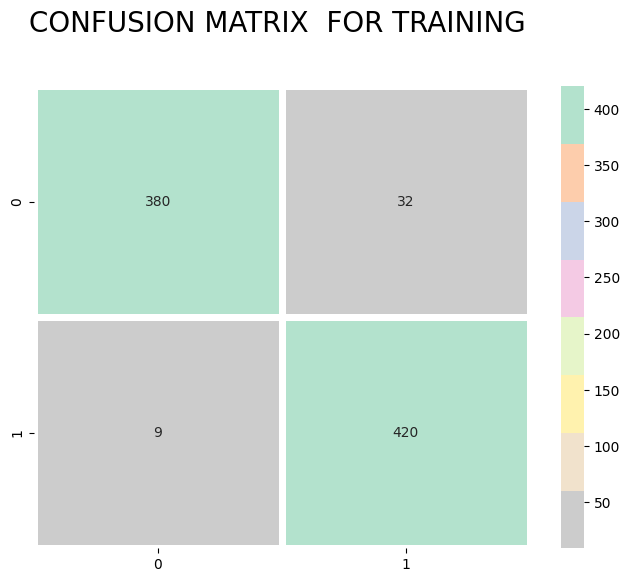

In [ ]:
# plotting confusion matrix for model.
# set figure size for graph. 
Matplot.figure(figsize=[8,6])
cm= confusion_matrix(Ytrain_Heart_Data, ypred)
# pass the parameter to plot the matrix.
sns.heatmap(cm, annot=True, cmap="Pastel2_r", fmt='g', linewidths=5)
# set title for matrix.
Matplot.title("CONFUSION MATRIX  FOR TRAINING ", y=1.1, fontsize=20)
Matplot.show()#showing figure 

In [ ]:
F_P_RATE, T_P_RATE, thresholds = roc_curve(Ytrain_Heart_Data, ypred)
roc_auc = auc(F_P_RATE, T_P_RATE)
print("TRAINING ROC_AUC_SCORE:", roc_auc)

TRAINING ROC_AUC_SCORE: 0.9506755380541789


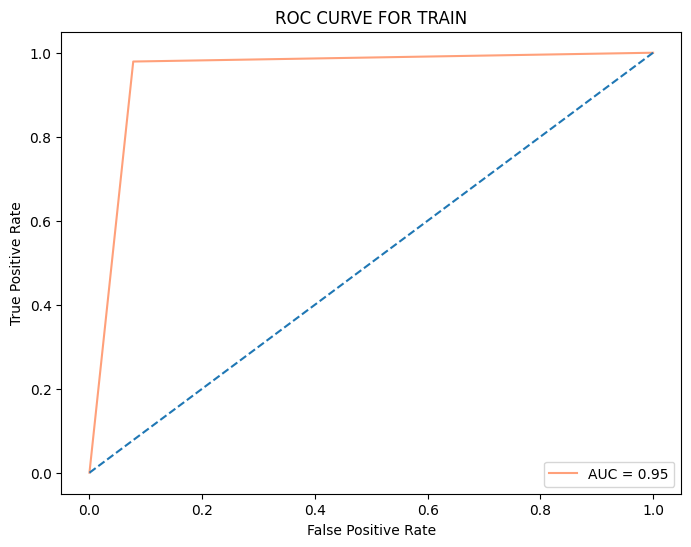

In [ ]:

Matplot.figure(figsize=(8,6)) # set figure size 
# set title name 
Matplot.title('ROC CURVE FOR TRAIN')
Matplot.plot(F_P_RATE,T_P_RATE, color='LightSalmon',label = 'AUC = %0.2f' % roc_auc)
Matplot.legend(loc = 'lower right')
Matplot.plot([0, 1], [0, 1],linestyle='--')
Matplot.axis('tight')
#set y axis name 
Matplot.ylabel('True Positive Rate')
# set x axis name 
Matplot.xlabel('False Positive Rate');

#TESTING RESULTS FOR  RANDOMFOREST CLASSIFIER MODEL

<!-- PRINTING TESTING RESULTS -->

In [ ]:
#Calculate the results and display 
ypred1= model1.predict(Xtest_Heart_Data) 
# Calculating and printing the accuracy score
print("TESTING ACC SCORE: %.3f" %(accuracy_score(Ytest_Heart_Data,ypred1)))
print("................................................")
# Calculating and printing the precision score
print("TESTING PRECISION SCORE: %.3f" %(precision_score(Ytest_Heart_Data,ypred1)))
print("................................................") 
# Calculating and printing the recall score
print("TESTING RECALL SCORE: %.3f" %(recall_score(Ytest_Heart_Data,ypred1)))
print("................................................")
 # Calculating and printing the F1 score
print("TESTING F1 SCORE: %.3f" %(f1_score(Ytest_Heart_Data,ypred1))) 

TESTING ACC SCORE: 0.934
................................................
TESTING PRECISION SCORE: 0.895
................................................
TESTING RECALL SCORE: 0.969
................................................
TESTING F1 SCORE: 0.931


In [ ]:
C_MATRIX = confusion_matrix(Ytest_Heart_Data,ypred1)

Sensitivity1 = C_MATRIX[0,0]/(C_MATRIX[0,0]+C_MATRIX[0,1])

Specificity1 = C_MATRIX[1,1]/(C_MATRIX[0,1]+C_MATRIX[1,1]) 

In [ ]:
# Showing Sensitivity accuracy 
print('SENSITIVITY: ', Sensitivity1)
print("....................................")
# Showing Specificity accuracy 
print('SPECIFICITY: ', Specificity1)

SENSITIVITY:  0.9035087719298246
....................................
SPECIFICITY:  0.8952380952380953


In [ ]:
print(classification_report(Ytest_Heart_Data,ypred1)) 

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       114
           1       0.90      0.97      0.93        97

    accuracy                           0.93       211
   macro avg       0.93      0.94      0.93       211
weighted avg       0.94      0.93      0.93       211



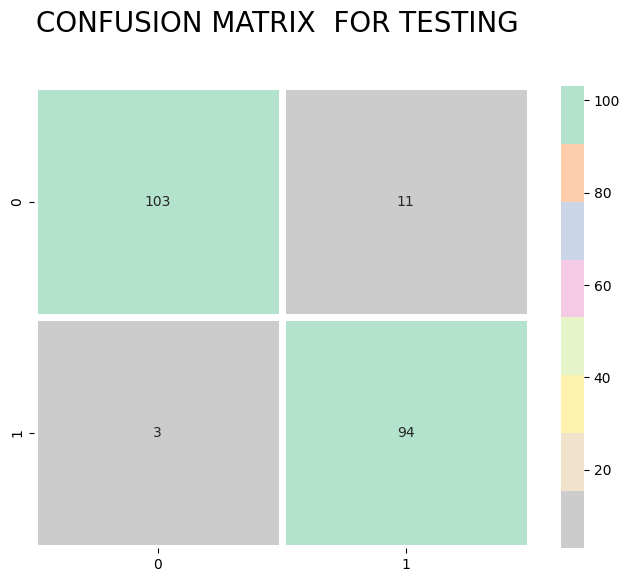

In [ ]:
# plotting confusion matrix for model.
# set figure size for graph. 
Matplot.figure(figsize=[8,6]) # set figure size 
cm= confusion_matrix(Ytest_Heart_Data, ypred1)
# pass the parameter to plot the matrix.
sns.heatmap(cm, annot=True, cmap="Pastel2_r", fmt='g', linewidths=5)
# set title for matrix.
Matplot.title("CONFUSION MATRIX  FOR TESTING ", y=1.1, fontsize=20)
Matplot.show() # showing figure 

In [ ]:
F_P_RATE, T_P_RATE, thresholds = roc_curve(Ytest_Heart_Data, ypred1)
roc_auc = auc(F_P_RATE, T_P_RATE)
# printing roc score 
print("TESTING ROC_AUC_SCORE:", roc_auc)

TESTING ROC_AUC_SCORE: 0.9362904684391391


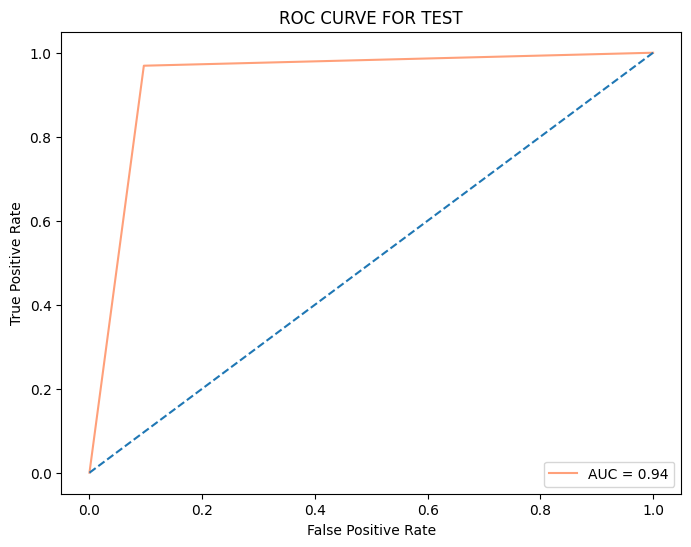

In [ ]:
Matplot.figure(figsize=(8,6))
Matplot.title('ROC CURVE FOR TEST')
Matplot.plot(F_P_RATE,T_P_RATE, color='LightSalmon',label = 'AUC = %0.2f' % roc_auc)
Matplot.legend(loc = 'lower right')
Matplot.plot([0, 1], [0, 1],linestyle='--')
Matplot.axis('tight')
# set y axis name 
Matplot.ylabel('True Positive Rate')
# set x axis name 
Matplot.xlabel('False Positive Rate');

#GradientBoostingClassifier  model

In [ ]:
#GradientBoostingClassifier model
model2= GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=0)
model2.fit(Xtrain_Heart_Data, Ytrain_Heart_Data) #model fitting 
y_pred= model2.predict(Xtrain_Heart_Data)  #predict model 

#TRAINING RESULTS FOR  GRADIENTBOOSTING MODEL

In [ ]:
#Calculate the results and display 
# Calculating and printing the accuracy score
print("TRAINING ACC SCORE: %.3f" %(accuracy_score(Ytrain_Heart_Data,y_pred)))
print(".................................................")
# Calculating and printing the precision score
print("TRAINING PRECISION SCORE: %.3f" %(precision_score(Ytrain_Heart_Data,y_pred)))
print(".................................................")
# Calculating and printing the recall score
print("TRAINING RECALL SCORE: %.3f" %(recall_score(Ytrain_Heart_Data,y_pred)))
print(".................................................")
 # Calculating and printing the F1 score
print("TRAINING F1 SCORE: %.3f" %(f1_score(Ytrain_Heart_Data,y_pred))) 

TRAINING ACC SCORE: 0.964
.................................................
TRAINING PRECISION SCORE: 0.954
.................................................
TRAINING RECALL SCORE: 0.977
.................................................
TRAINING F1 SCORE: 0.965


In [ ]:
C_MATRIX = confusion_matrix(Ytrain_Heart_Data,y_pred)

Sensitivity = C_MATRIX[0,0]/(C_MATRIX[0,0]+C_MATRIX[0,1])

Specificity = C_MATRIX[1,1]/(C_MATRIX[0,1]+C_MATRIX[1,1]) 
# Showing Sensitivity accuracy 
print('SENSITIVITY: ', Sensitivity)
print("........................")
# Showing Specificity accuracy 
print('SPECIFICITY: ', Specificity)

SENSITIVITY:  0.9514563106796117
........................
SPECIFICITY:  0.9544419134396356


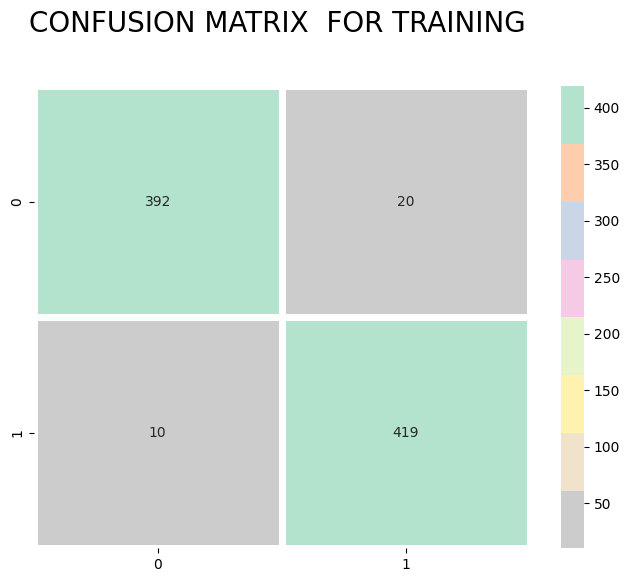

In [ ]:
# plotting confusion matrix for model.
# set figure size for graph. 
Matplot.figure(figsize=[8,6])
cm= confusion_matrix(Ytrain_Heart_Data, y_pred)
# pass the parameter to plot the matrix.
sns.heatmap(cm, annot=True, cmap="Pastel2_r", fmt='g', linewidths=5)
# set title for matrix.
Matplot.title("CONFUSION MATRIX  FOR TRAINING ", y=1.1, fontsize=20)
Matplot.show() # showing graph

In [ ]:
print(classification_report(Ytrain_Heart_Data,y_pred)) # plotting classification  report 

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       412
           1       0.95      0.98      0.97       429

    accuracy                           0.96       841
   macro avg       0.96      0.96      0.96       841
weighted avg       0.96      0.96      0.96       841



In [ ]:
F_P_RATE, T_P_RATE, thresholds = roc_curve(Ytrain_Heart_Data, y_pred)
roc_auc = auc(F_P_RATE, T_P_RATE)
#print roc score
print("TRAINING ROC_AUC_SCORE:", roc_auc)

TRAINING ROC_AUC_SCORE: 0.9640731436847942


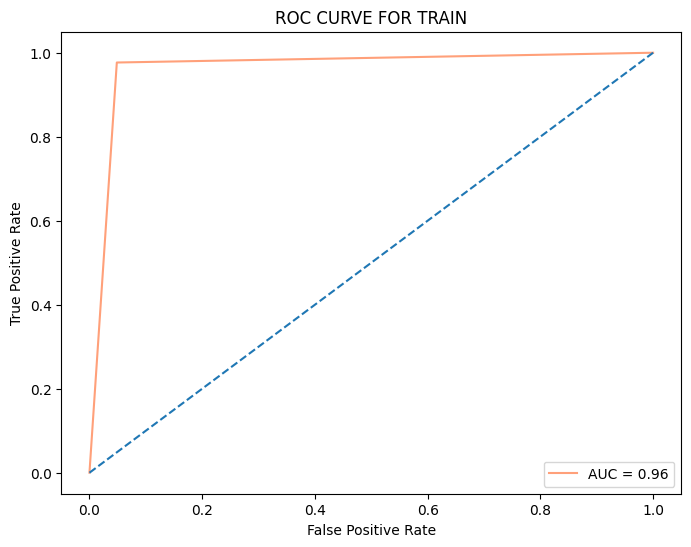

In [ ]:
Matplot.figure(figsize=(8,6)) #set figure size 
# set title name 
Matplot.title('ROC CURVE FOR TRAIN')
Matplot.plot(F_P_RATE,T_P_RATE, color='LightSalmon',label = 'AUC = %0.2f' % roc_auc)
Matplot.legend(loc = 'lower right')
Matplot.plot([0, 1], [0, 1],linestyle='--')
Matplot.axis('tight')
#set y axis name 
Matplot.ylabel('True Positive Rate')
# set x axis name 
Matplot.xlabel('False Positive Rate');

#TESTING RESULTS FOR  GRADIENTBOOSTING MODEL

In [ ]:
#Calculate the results and display 
y_pred1 = model2.predict(Xtest_Heart_Data)  # Predicting the labels for the test data using model2
# Calculating and printing the accuracy score
print("TESTING ACC SCORE: %.3f" %(accuracy_score(Ytest_Heart_Data, y_pred1)))  
print(".................................................")
# Calculating and printing the precision score
print("TESTING PRECISION SCORE: %.3f" %(precision_score(Ytest_Heart_Data, y_pred1)))  
print(".................................................")
# Calculating and printing the recall score
print("TESTING RECALL SCORE: %.3f" %(recall_score(Ytest_Heart_Data, y_pred1)))  
print(".................................................")
 # Calculating and printing the F1 score
print("TESTING F1 SCORE: %.3f" %(f1_score(Ytest_Heart_Data, y_pred1))) 

TESTING ACC SCORE: 0.943
.................................................
TESTING PRECISION SCORE: 0.905
.................................................
TESTING RECALL SCORE: 0.979
.................................................
TESTING F1 SCORE: 0.941


In [ ]:
C_MATRIX = confusion_matrix(Ytest_Heart_Data,y_pred1)
Sensitivity1 = C_MATRIX[0,0]/(C_MATRIX[0,0]+C_MATRIX[0,1])
Specificity1 = C_MATRIX[1,1]/(C_MATRIX[0,1]+C_MATRIX[1,1]) 
# Showing Sensitivity accuracy 
print('SENSITIVITY: ', Sensitivity1)
print("..................................")
# Showing Specificity accuracy 
print('SPECIFICITY: ', Specificity1)

SENSITIVITY:  0.9122807017543859
..................................
SPECIFICITY:  0.9047619047619048


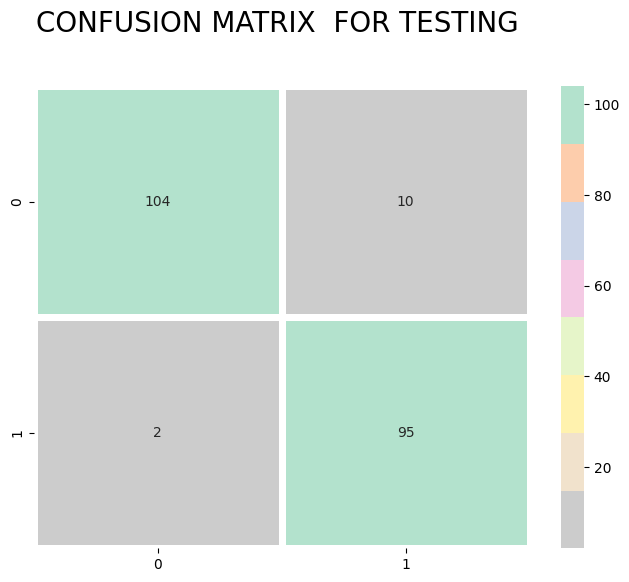

In [ ]:
# plotting confusion matrix for model.
# set figure size for graph. 
Matplot.figure(figsize=[8,6])
cm= confusion_matrix(Ytest_Heart_Data, y_pred1)
# pass the parameter to plot the matrix.
sns.heatmap(cm, annot=True, cmap="Pastel2_r", fmt='g', linewidths=5)
# set title for matrix.
Matplot.title("CONFUSION MATRIX  FOR TESTING ", y=1.1, fontsize=20)
Matplot.show() 

In [ ]:
#plotting classification report 
print(classification_report(Ytest_Heart_Data,y_pred1)) 

              precision    recall  f1-score   support

           0       0.98      0.91      0.95       114
           1       0.90      0.98      0.94        97

    accuracy                           0.94       211
   macro avg       0.94      0.95      0.94       211
weighted avg       0.95      0.94      0.94       211



In [ ]:
# Calculate the results and display  roc score 
F_P_RATE, T_P_RATE, thresholds = roc_curve(Ytest_Heart_Data, y_pred1)
roc_auc = auc(F_P_RATE, T_P_RATE)
print("TESTING ROC_AUC_SCORE:", roc_auc)

TESTING ROC_AUC_SCORE: 0.9458310725266774


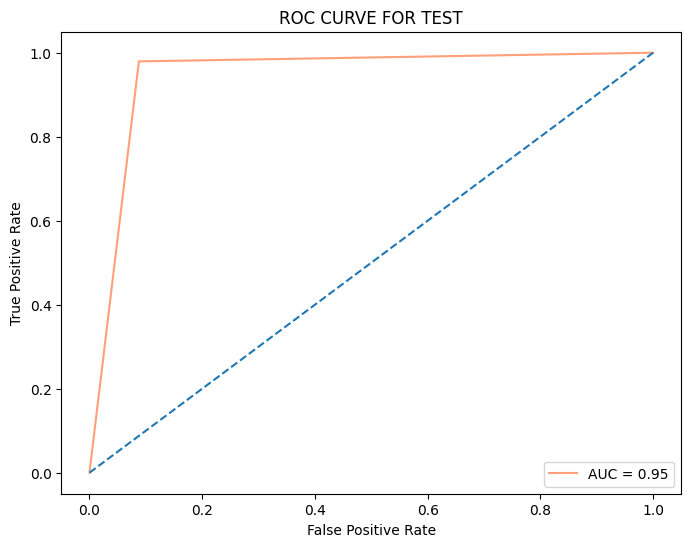

In [ ]:
Matplot.figure(figsize=(8,6)) #set figure size 
# set title name 
Matplot.title('ROC CURVE FOR TEST')
Matplot.plot(F_P_RATE,T_P_RATE, color='LightSalmon',label = 'AUC = %0.2f' % roc_auc)
Matplot.legend(loc = 'lower right')
Matplot.plot([0, 1], [0, 1],linestyle='--')
Matplot.axis('tight')
#set the  y axis name 
Matplot.ylabel('True Positive Rate')
# set the x axis name 
Matplot.xlabel('False Positive Rate');